# [Computational Social Science] 
## 3-1 Classification - Student Version

In this lab we will cover **Classification** methods. Some of this might look familiar from your previous statistics courses where you fit models on binary or categorical outcomes.

---

## Virtual Environment
Remember to always activate your virtual environment first before you install packages or run a notebook! This helps to prevent conflicts between dependencies across different projects and ensures that you are using the correct versions of packages. You must have created anaconda virtual enviornment in the `Anaconda Installation` lab. If you have not or want to create a new virtual environment, follow the instruction in the `Anaconda Installation` lab. 

<br>

If you have already created a virtual enviornment, you can run the following command to activate it: 

<br>

`conda activate <virtual_env_name>`

<br>

For example, if your virtual environment was named as CSS, run the following command. 

<br>

`conda activate CSS`

<br>

To deactivate your virtual environment after you are done working with the lab, run the following command. 

<br>

`conda deactivate`

<br>

## Data

We're going to use our [Census Income dataset](https://archive.ics.uci.edu/ml/datasets/Census+Income) dataset again for this lab. Load the dataset in, and explore it.

In [1]:
# load libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# settings
%matplotlib inline
sns.set_style("darkgrid")

In [2]:
# Create a list of column names, found in "adult.names"
col_names = ['age', 
             'workclass', 
             'fnlwgt',
             'education', 
             'education-num',
             'marital-status', 
             'occupation', 
             'relationship', 
             'race', 
             'sex', 
             'capital-gain',
             'capital-loss', 
             'hours-per-week',
             'native-country', 
             'income-bracket']

# Read table from the data folder
census = pd.read_table("../../data/adult.data", sep = ',', names = col_names)

In [5]:
# view the dataset
census.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income-bracket
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [7]:
# look at unique values of income-bracket
census['income-bracket'].unique()

array([' <=50K', ' >50K'], dtype=object)

### Preprocessing
Recall that before we try to train machine learning models on a dataset like this, we need to preprocess it. Let's preprocess the data to get it ready for training machine learning algorithms. Then, create a dataframe, **X**, that contains all of the features, and an array, **y**, that contains the target. *Note if you create a Pandas series with y it will throw an error later in the script.*

*Hint: Use `LabelBinarizer()` to transform your **y** variable, and `get_dummies()` to create dummy variables for your **X**'s.* 

In [21]:
# Target
# ----------
lb = LabelBinarizer()                                # LabelBinarizer creates 1 column from binary labeled column 
y = census['income-bracket-binary'] =  lb.fit_transform (census["income-bracket"]) # transform and fit in same step   

# Features
# ----------
X_prep  = census.drop (['income-bracket','income-bracket-binary'], axis=1)     # drop income-bracket varaible
X = pd.get_dummies(X_prep,dtype=int)          # get dummies
X.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
print(y)

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [1]]


### Class Balance

Before we start modeling, let's look at the distribution of the target variable. Visualize the distribution of the target variable ("income-bracket").

**QUESTION:** What do you notice? What do you think this pattern suggests about how easy or difficult it would be for a machine learning model to make the correct classifications?

(array([24720.,  7841.]),
 array([0. , 0.5, 1. ]),
 <BarContainer object of 2 artists>)

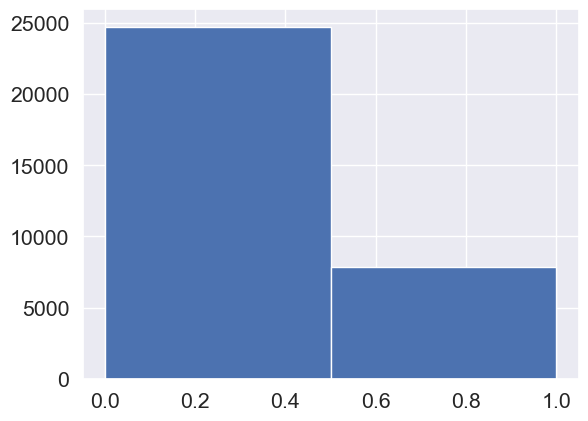

In [58]:
y_flat = y.ravel()
plt.hist(y_flat, bins=2)

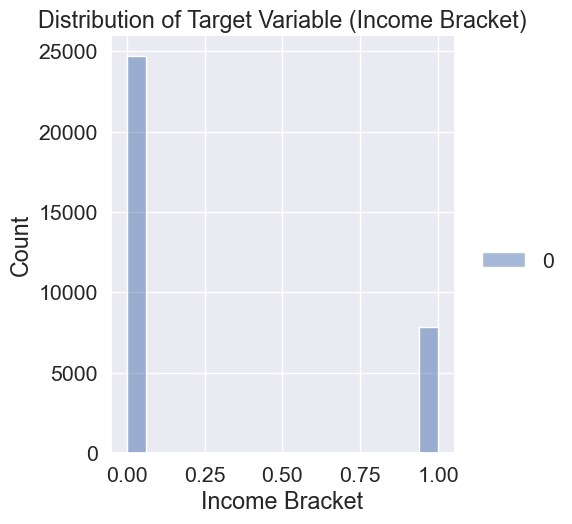

In [60]:

# distribution plot of the outcome variable
sns.displot(y)   # notice the default is a histogram
plt.title("Distribution of Target Variable (Income Bracket)")
plt.xlabel('Income Bracket')
plt.ylabel('Count')
plt.show()

**ANSWER**:

### Data Splitting

Split the data into train, validation, and test sets. Be sure to stratify the splits by the outcome so that we have as representative of a breakdown of outcome in our training/test/validations datasets as we can. To do this, you will need to specify the appropriate option in the `train_test_split()` fuction. 

In [35]:
# Set seed
np.random.seed(10)

# training and test split 
X_train, X_test, y_train, y_test = train_test_split (X,
                                                    y,
                                                    train_size= 0.80,
                                                    test_size= 0.20,
                                                    stratify=y)

# training and validation split 

X_train, X_validate, y_train, y_validate = train_test_split(X_train,
                                                           y_train,
                                                           train_size= 0.75,
                                                           test_size= 0.20,
                                                           stratify= y_train)

## Logistic Regression

Let's look at a [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). This example should look familiar from the Introduction to Machine Learning lab. Make a logistic regression model, fit it to the training data, and predict on the validation data.

*Note that you will need to use `ravel()` from the Numpy package to fit the training data in the logit model because the object type for the outcome is not the right type to be fed into the log.*

In [41]:
# create a model
logit_reg = LogisticRegression()

# fit the model
logit_model = logit_reg.fit(X_train, y_train.ravel())

# predict on the validation data
y_pred = logit_model.predict(X_validate)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Next, we create a dataframe with the features and the logit coefficients (**Note**: For the logit coefficients we can use `np.transpose`, or extract the coefficients from the 1d array). 

In [45]:
# extract the coefficents and create a dataframe for plotting
logit_data = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(logit_model.coef_))], axis = 1)
logit_data.columns = ['Feature', 'Coefficient']
logit_data['abs_coef'] = abs(logit_data['Coefficient'])
print(logit_data)|

                             Feature  Coefficient  abs_coef
0                                age     0.003413  0.003413
1                             fnlwgt    -0.000003  0.000003
2                      education-num    -0.004219  0.004219
3                       capital-gain     0.000326  0.000326
4                       capital-loss     0.000751  0.000751
..                               ...          ...       ...
103         native-country_ Thailand    -0.000001  0.000001
104  native-country_ Trinadad&Tobago    -0.000016  0.000016
105    native-country_ United-States    -0.004908  0.004908
106          native-country_ Vietnam    -0.000081  0.000081
107       native-country_ Yugoslavia     0.000013  0.000013

[108 rows x 3 columns]


Now, plot the 10 coefficients with the largest absolute value based on the code above.

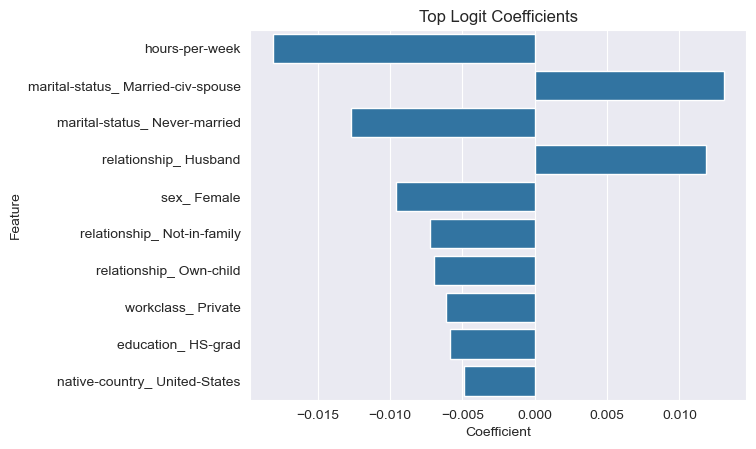

In [47]:
# plot 

sns.barplot(x="Coefficient", 
            y="Feature", 
            data=logit_data.nlargest(10, 'abs_coef')).set_title("Top Logit Coefficients")
plt.show()

We can create a confusion matrix to visualize how well you did with your predictions. 

**QUESTION:** What do you notice? 

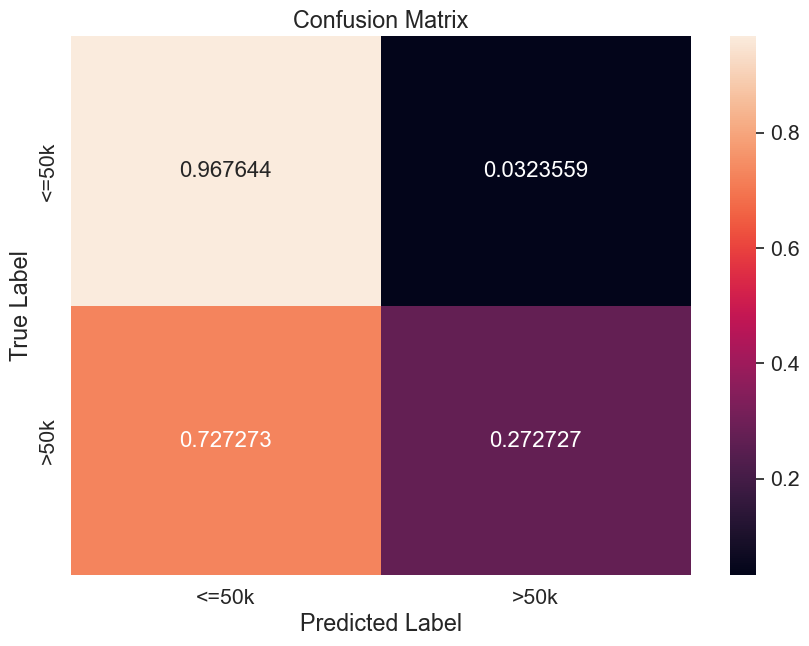

In [53]:
# create a confusion matrix
cf_matrix = confusion_matrix(y_validate,
                             y_pred, 
                             normalize = "true")

# convert to a dataframe
df_cm = pd.DataFrame(cf_matrix, range(2), range(2))

# set figure specifications
df_cm = df_cm.rename(index=str, columns={0: "<=50k", 1: ">50k"})
df_cm.index = ["<=50k", ">50k"]
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4) #for label size
sns.heatmap(df_cm, 
           annot=True,
           annot_kws={"size": 16},
           fmt='g')

# plot 
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()



**ANSWER:** ... 

## Hyperparameter Tuning

As with sklearn's regression methods, we can also use [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to search for optimal hyperparameters. 

Let's apply the grid search to a logistic regresssion model to find the best hyperparameter values. **Note**: You might notice that the grid search takes a **very** long time to complete depending on the model and hyperparameters chosen.

In [56]:
# hyperparameter tuning
# ----------

# import libraries
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore')
from sklearn.metrics import accuracy_score

# set parameters
param_grid = {'penalty': ['l1', 'l2', 'elasticnet'],
             'C': np.arange(.1, 1, .1),
             'fit_intercept': [True, False],
             'solver': ['liblinear', 'saga']}

# execute the grid search and fit to training data
logit_grid = GridSearchCV(logit_model, 
                          param_grid, 
                          cv=3)
logit_grid.fit(X_train, 
               y_train)

# choose best performing model
best_index = np.argmax(logit_grid.cv_results_["mean_test_score"])
best_logit_pred = logit_grid.best_estimator_.predict(X_validate)

# print results
print(logit_grid.cv_results_["params"][best_index])
print('Validation Accuracy', accuracy_score(best_logit_pred, y_validate))

{'C': 0.1, 'fit_intercept': True, 'penalty': 'elasticnet', 'solver': 'liblinear'}
Validation Accuracy 0.8508637236084453


## Metrics

In machine learning, accuracy isn't the only metric that we might care about. **Accuracy** is an expression of ratio of correct observations relative to incorrect observations. This calculation alone does not tell us much about whether we did a good job predicting all of the other categories that we might be concerned about.

Consider our census dataset. We saw earlier that the target data is not equally distributed - there were far more people with "<=50k" income. As we saw in our confusion matrices, our algorithms tended to predict observations belonging to the "<=50k" category remarkably well, but tended to do much worse with the ">50k" category. 

**QUESTION:** Why do you think this might be the case?

**Answer**: 

Let's define a few metrics that will help us move beyond accuracy as our only measure:

$$
True \space Positives = \sum({Predicted \space Positives = Observed \space Positives})
$$

$$
False \space Positives = \sum({Predicted \space Positives \space != Observed \space Positives})
$$

$$
True \space Negatives = \sum({Predicted \space Negatives = Observed \space Negatives})
$$

$$
False \space Negatives = \sum({Predicted \space Negatives \space != Observed \space Negatives})
$$

Imagine we were primarily interested in detecting whether someone is ">50k". We'll call this the "positive" class. A "predicted" observation is the value the model predicted, while the "observed" observation is the value in the ground-truth labels. So a **"true positive"** in this case would be instances when the model predicted someone to be in the ">50k" category AND they were in the ">50k" category in reality. Similarly, a **false positive** would be instances where the model predicted someone was in the ">50k" category when they were actually in the "<=50k" category in reality. 

Use your best model from hyperparameter to predict on the validation set and see how you did on each of these metrics. Since, the confusion matrix is actually a great way to visualize all of these, let's use that. 

**QUESTION:** What does each quadrant of the matrix correspond to in terms of these metrics?

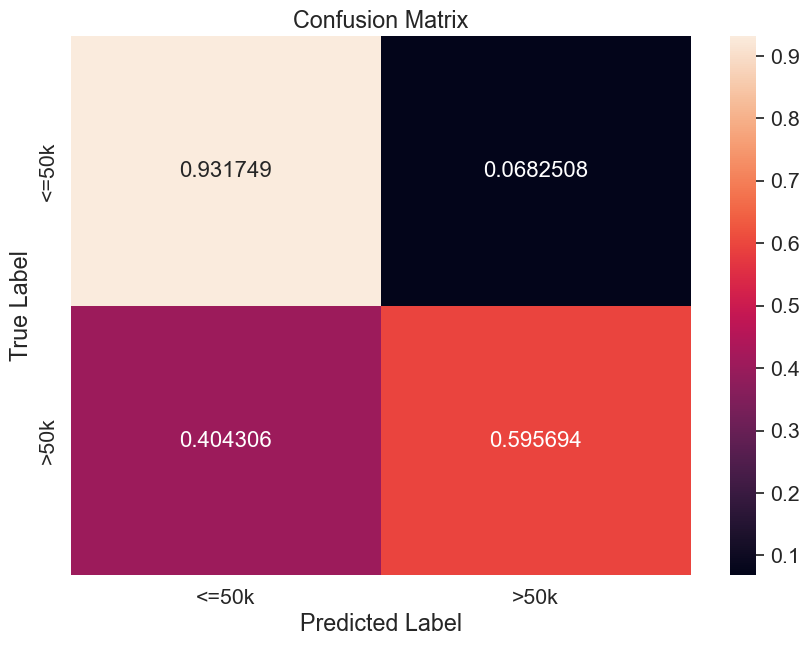

In [64]:
# specify confusion matrix
cf_matrix = confusion_matrix(y_validate, 
                             best_logit_pred, 
                             normalize = "true")

# convert to dataframe
df_cm = pd.DataFrame(cf_matrix, 
                     range(2),
                     range(2))

# label dataframe 
df_cm = df_cm.rename(index=str, columns={0: "<=50k", 1: ">50k"})
df_cm.index = ["<=50k", ">50k"]

# plot
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, 
           annot=True,
           annot_kws={"size": 16},
           fmt='g')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

**ANSWER**: 

These metrics matter in the social sciences because we usually are not given balanced datasets, and we are oftentimes concerned with predicting rare events. Predicting rare events like fraud, credit defaults, and mortality is difficult. Optimizing on accuracy alone can be misleading if the algorithm just guesses the majority class every time without ever predicting the outcome of interest. 

### Accuracy

Recall the metrics we defined: **True Positives (TP)**, **False Positives (FP)**, **True Negatives (TN)**, and **False Negatives (FN)**. Accuracy can be expressed as:

$$
Accuracy = \frac{TP + TN}{TP + TN + FP + FN}
$$

**QUESTION:** In plain language, what does this formula represent?

**ANSWER**:  

Write code to calculate the accuracy of your logistic regression. Calculate the number of true positives, false positives, true negatives, and false negatives and then calculate and print the accuracy.

*Tip: initialize the variables with 0 and use the `i` iterator in the for-loop when indexing your `y_validate` and `y_pred` variables.* 

In [72]:

# loop over each observation to assign to TP, FP, TN, and FN
TP = sum(1 for y_val, y_pred_val in zip(y_validate, y_pred) if y_val ==1 and y_pred_val ==1)
TN = sum(1 for y_val, y_pred_val in zip (y_validate, y_pred) if y_val ==0 and y_pred_val == 0)
FP = sum(1 for y_val, y_pred_val in zip (y_validate, y_pred) if y_val ==0 and y_pred_val ==1)
FN =sum(1 for y_val, y_pred_val in zip(y_validate, y_pred) if y_val ==1 and y_pred_val ==0)
print (TP,TN,FP,FN)

342 3828 128 912


In [74]:
# calculate accuracy based on the formula defined above
accuracy = (TP+TN)/(TP+TN+FP+FN)
print("Accuracy is", accuracy)

Accuracy is 0.800383877159309


## Precision

Precision is a measure of how well calibrated predictions are. The formula for precision is:

$$
Precision = \frac{TP}{TP + FP}
$$

**QUESTION**: In plain language, what does this formula tell us?

**ANSWER**: ...

Calculate and print the precision for the logistic regression.

In [76]:
# calculate precision based on the formula defined above
precision = TP/ (TP+FP)
print("Precision is", precision)

Precision is 0.7276595744680852


## Recall

Recall is defined as:

$$
Recall = \frac{TP}{TP + FN}
$$

**QUESTION**: In plain language, what does the formula tell us?

**ANSWER**: ...

Calculate the recall for our logistic regression model.

In [78]:
# calculate recall based on the formula defined above
recall = TP/(TP+FN)
print("Recall is", recall)

Recall is 0.2727272727272727


**QUESTION**: How did we do on precision and recall? Could you optimize for one or the other?

**ANSWER**: ...

## F1 Score

The precision-recall tradeoff can be managed in a few different ways. One popular metric is the F1 score. It is defined as:

$$
F1 = 2 * \frac{precision * recall}{precision + recall}
$$

Calculate and print the f1 score.

In [ ]:
# calculate the F1 Score based on the formula defined above
f1 = ...
print("F1 Score is", f1)

**QUESTION**: How does F1 trade off between precision and recall? What are the advantages and disadvantages?

**ANSWER**: ...

## AUC-ROC

[Area Under the Curve - Receiver Operating Characteristic (AUC-ROC)](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) is a popular method for seeing how well an algorithm does at separating between two classes. It is calculated by plotting the True Positive Rate against the False Positive Rate. Let's define these quantities:

$$
True \space Positive \space Rate(TPR) = Sensitivity = \frac{TP}{TP + FN}
$$

Hm, this formula looks familiar. In fact, it is exactly the same as Recall! Meanwhile, the False Positive Rate is:

$$
False \space Positive \space Rate (FPR) = 1 - Specificity = \frac{FP}{TN + FP}
$$

**QUESTION**: Why does plotting TPR against FPR express separability between class labels?

**ANSWER**: ...

Fill in the following code to plot the AUC-ROC for the logistic regression and a "no skill" model. Make sure to look up documentation as necessary.

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.618


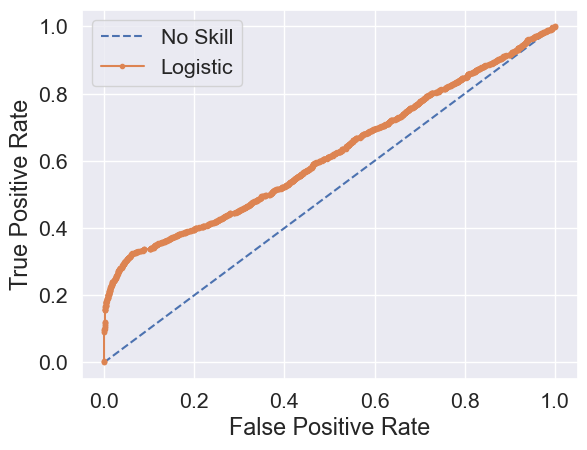

In [82]:
# ROC curve and AUC

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_validate))]

# predict probabilities for logistic regression - enter your validation X!
lr_probs = logit_model.predict_proba(X_validate)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_validate, ns_probs)
lr_auc = roc_auc_score(y_validate, lr_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_validate, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_validate, lr_probs)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

**QUESTION**: How did the logistic regression do on the AUC-ROC metric? Compared to the "no skill" decision rule, was it a meaningful improvement?

**ANSWER**: ...

## Over and Under Sampling

We have seen that imbalanced data can cause all sorts of problems and give us misleading results, especially if we only focus on accuracy. How can we correct for these problems? One simple method is to **resample** the data. For example, you might **oversample** the minority class or **undersample** the majority class. Let's use the [**imblearn**](https://imbalanced-learn.readthedocs.io/en/stable/api.html) to try this out. 

First, you might need to run the cell below to install the library. Anytime you use "!" in a Jupyter notebook, this will actually run a bash command. If it's already there, you'll get a message that the requirement is already satisifed. 

In [80]:
# install imbalance-learn 
# MAKE SURE TO INSTALL OLDER VERSION OR ELSE IT WON'T RUN, BECAUSE IT'S NOT COMPATIBLE WITH CURRENT SCIKIT-LEARN
!pip install imbalanced-learn==0.09.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.3/199.3 kB 7.1 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.12.3
    Uninstalling imbalanced-learn-0.12.3:
      Successfully uninstalled imbalanced-learn-0.12.3


Now let's import the RandomOverSampler and RandomUnderSampler methods. 

**QUESTION**: Why would we resample the training set, instead of the dataset or the validation/test sets?

**ANSWER**: ...

In [84]:
# call libraries
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

Next use either the `RandomOverSampler` or `RandomUnderSampler` to resample the training set.
*Hint: we need to call the [`.fit_resample`](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html) method on our X_train and y_train variables.*

In [86]:
# intitate instance of sampler and specify strategy
random_over_sampler = RandomOverSampler(sampling_strategy=0.5)
random_under_sampler = RandomUnderSampler(sampling_strategy=0.5,
                                          replacement = True) # be sure to specify sampling with replace)

# fit to training data
X_train_new, y_train_new = random_under_sampler.fit_resample(X_train, 
                                                             y_train)

**QUESTION**: What do you notice about the resampled training targets? What might be some issues with over and undersampling?

**ANSWER**: ...

Let's retrain the logistic regression model on the newly resampled data. How does AUC-ROC change?

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.660


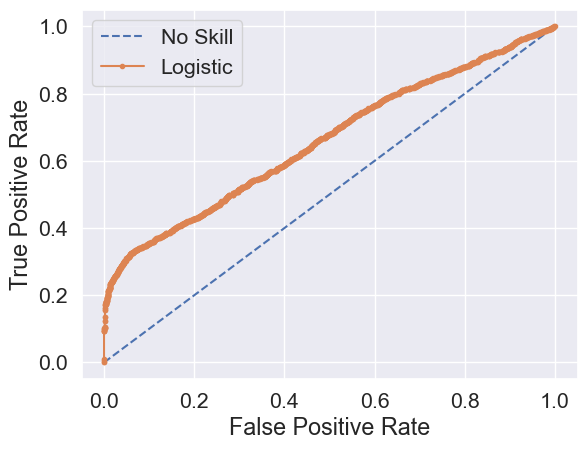

In [88]:
# model prep 
# -----------

# fit the model
logit_model = logit_reg.fit(X_train_new, y_train_new)

# prediction to validation data
y_pred = logit_model.predict(X_validate)

# roc curve and auc
# -----------

# split into train/test sets
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_validate))]

# predict probabilities for logistic regression
lr_probs = logit_model.predict_proba(X_validate)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_validate, ns_probs)
lr_auc = roc_auc_score(y_validate, lr_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_validate, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_validate, lr_probs)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

**ANSWER**: ...

Overall, while sklearn puts together many of the methods we need to train, predict, and visualize the results of our machine learning, there are a lot of substantive choices involved. As you can see, even a slightly imbalanced dataset can cause problems. If you optimize only on accuracy, you might miss relevant aspects of the problem. Be mindful of the various metrics available, and decide which ones best answer the scientific question you have in mind.

---
Authored by Aniket Kesari. Updated by K. Quinn Fall 2021, by Tom van Nuenen Fall 2022, and Kasey Zapatka Fall 2023.